### Fitting a Michaelis-Menten model and drawing the results in R ###
This is a description of how to use the R language to do a nonlinear fit of enzyme kinematic data.
I have some data for the enzyme acid phosphatase binding to PNPP substrate of various concentration of the substrate. The table shows my data.
|$$Substrate \\\ \mu M$$|$$V_0 \\\ \mu M/sec $$|
|-------------------|--------------------------|
|9.998|0.041|
|25|0.047|
|50|0.060|
|100|0.071|
|250|0.057|
|500|0.082|
|1000|0.139|
|1875|0.126|

We can load this data table into an R structure

In [191]:
mm <- structure(list(S = c(9.998, 25, 50, 100, 1000, 1875),
                     v = c(0.041, 0.047, 0.060, 0.071, 0.139, 0.126)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mm)

         S     v
1    9.998 0.041
2   25.000 0.047
3   50.000 0.060
4  100.000 0.071
5 1000.000 0.139
6 1875.000 0.126


Now we can import a couple of libraries

In [192]:
library(drc) # for fitting Michaelis Menten model
library(ggplot2) # for drawing

In [193]:
model.drm <- drm (v ~ S, data = mm, fct = MM.2())

mml <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mml$v <- predict(model.drm, newdata = mml)

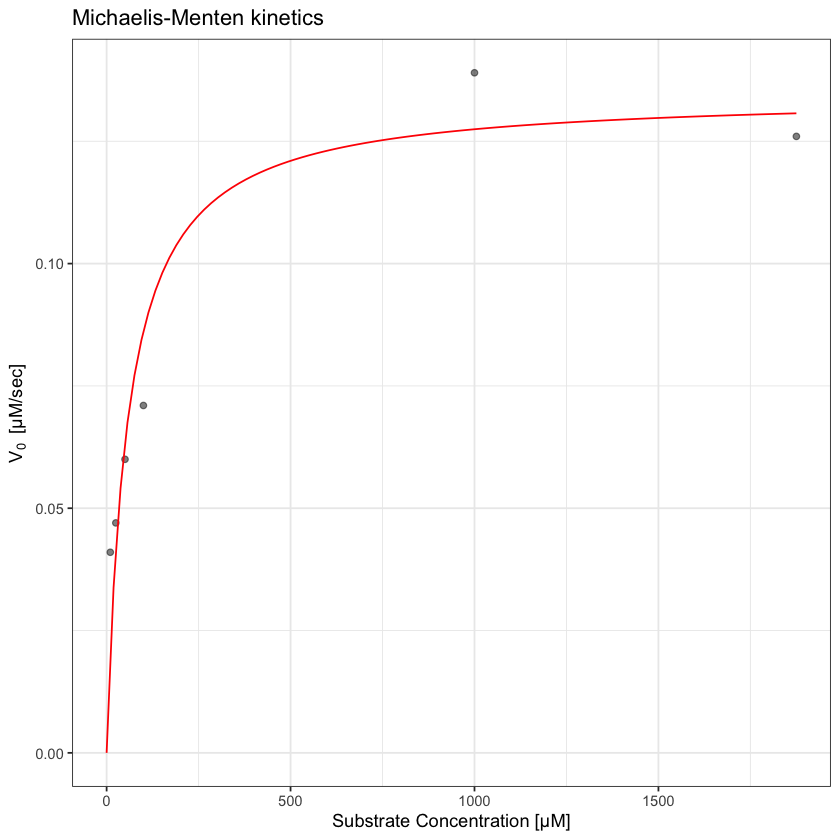

In [194]:
ggplot(mm, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [μM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5) +
  geom_line(data = mml, aes(x = S, y = v), colour = "red")

In [195]:
ggsave("mm.pdf", width = 6, height = 4, device = cairo_pdf)

In [196]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mm, 
                 start = list(K = max(mm$v)/2, Vm = max(mm$v)))

In [197]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
K  56.37950   18.41773   3.061 0.037616 *  
Vm  0.13464    0.01161  11.594 0.000316 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01462 on 4 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 2.302e-06


Inhibition by ion Br-

The data for NaBr

In [198]:
mmBr <- structure(list(S = c(7.531538317, 18.83239171, 37.66478343, 188.3239171, 753.2956685, 1412.429379),
                     v = c(0.022916667, 0.020833333, 0.052314815, 0.085416667, 0.090046296, 0.098842593)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mmBr)


            S          v
1    7.531538 0.02291667
2   18.832392 0.02083333
3   37.664783 0.05231482
4  188.323917 0.08541667
5  753.295669 0.09004630
6 1412.429379 0.09884259


In [199]:
model.drm <- drm (v ~ S, data = mmBr, fct = MM.2())

mml <- data.frame(S = seq(0, max(mmBr$S), length.out = 100))
mml$v <- predict(model.drm, newdata = mml)

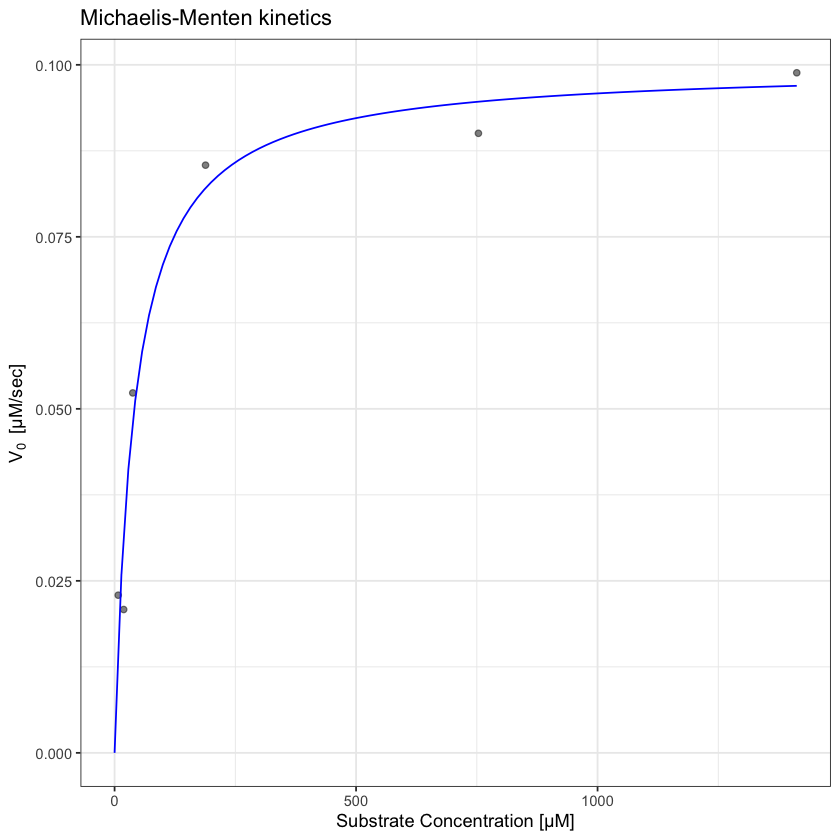

In [200]:
ggplot(mmBr, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5) +
  geom_line(data = mml, aes(x = S, y = v), colour = "blue")

In [201]:
ggsave("mmBr.pdf", width = 6, height = 4,device = cairo_pdf)

In [202]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmBr, 
                 start = list(K = max(mmBr$v)/2, Vm = max(mmBr$v)))

In [203]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  40.507520   9.865613   4.106   0.0148 *  
Vm  0.099727   0.005562  17.930 5.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007484 on 4 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 8.767e-07


The data for NaNO<sub>3</sub>


In [204]:
mmNO3 <- structure(list(S = c(8.017076373, 20.04670883, 40.09341766, 80.18683533, 200.4670883, 801.8683533),
                     v = c(0.009259259, 0.014583333, 0.018981481, 0.031944444, 0.030787037, 0.044212963)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
#print(mmNO3)

In [205]:
model.drm <- drm (v ~ S, data = mmNO3, fct = MM.2())

mml <- data.frame(S = seq(0, max(mmNO3$S), length.out = 100))
mml$v <- predict(model.drm, newdata = mml)

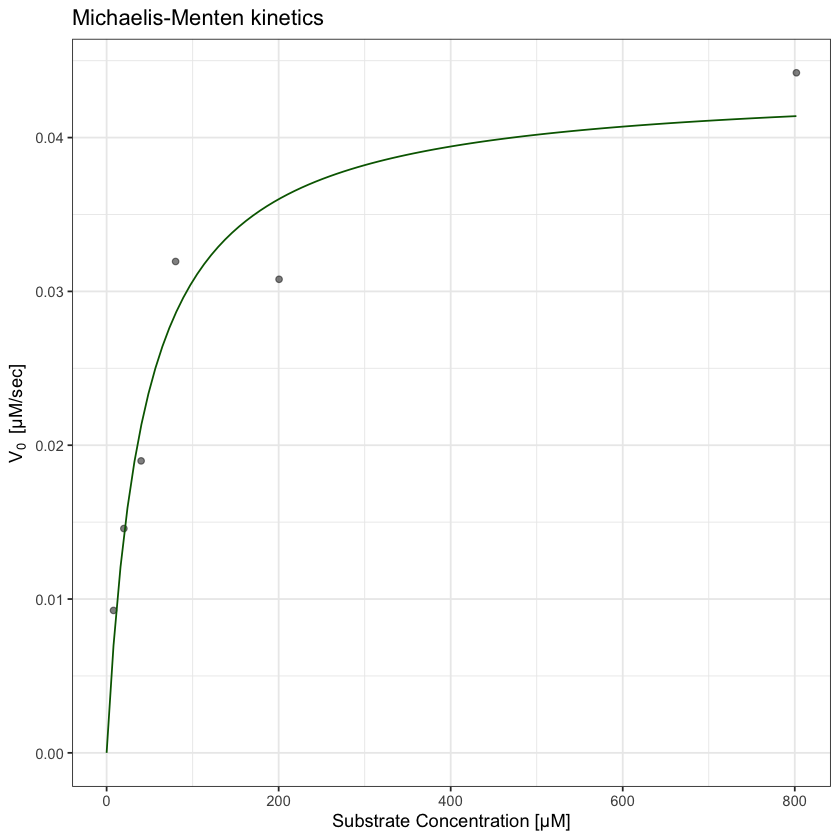

In [206]:
ggplot(mmNO3, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ylab("Speed [dE/sec]") +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5) +
  geom_line(data = mml, aes(x = S, y = v), colour = "dark green")

In [207]:
ggsave("mmNO3.pdf", width = 6, height = 4,device = cairo_pdf)

In [208]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmNO3, 
                 start = list(K = max(mmNO3$v)/2, Vm = max(mmNO3$v)))

In [209]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  42.081462  12.449403    3.38 0.027780 *  
Vm  0.043567   0.003752   11.61 0.000314 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003783 on 4 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 9.656e-06
